# Principal Component Analysis
Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the **Principal Components**. It is one of the popular tools that is used for exploratory data analysis and predictive modeling. It is a technique to draw strong patterns from the given dataset by reducing the variances.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality. Some real-world applications of PCA are **_image processing, movie recommendation system, optimizing the power allocation in various communication channels._** It is a feature extraction technique, so it contains the important variables and drops the least important variable.

## The PCA algorithm is based on some mathematical concepts such as:

- Variance and Covariance
- Eigenvalues and Eigen factors

## Some common terms used in PCA algorithm:

- **Dimensionality:** It is the number of features or variables present in the given dataset. More easily, it is the number of columns present in the dataset.
- **Correlation:** It signifies that how strongly two variables are related to each other. Such as if one changes, the other variable also gets changed. The correlation value ranges from -1 to +1. Here, -1 occurs if variables are inversely proportional to each other, and +1 indicates that variables are directly proportional to each other.
- **Orthogonal:** It defines that variables are not correlated to each other, and hence the correlation between the pair of variables is zero.
- **Eigenvectors:** If there is a square matrix M, and a non-zero vector v is given. Then v will be eigenvector if Av is the scalar multiple of v.
- **Covariance Matrix:** A matrix containing the covariance between the pair of variables is called the Covariance Matrix.

## Principal Components in PCA

The output of PCA are the Principal Components. The number of these PCs are either equal to or less than the original features present in the dataset. Some properties of these principal components are given below:

- The principal component must be the linear combination of the original features.
- These components are orthogonal, i.e., the correlation between a pair of variables is zero.
- The importance of each component decreases when going to 1 to n, it means the 1 PC has the most importance, and n PC will have the least importance.

## Steps for PCA algorithm

1. **Getting the dataset**  
  Firstly, we need to take the input dataset and divide it into two subparts X and Y, where X is the training set, and Y is the validation set.

2. **Representing data into a structure**  
  Now we will represent our dataset into a structure. Such as we will represent the two-dimensional matrix of independent variable X. Here each row corresponds to the data items, and the column corresponds to the Features. The number of columns is the dimensions of the dataset.

3. **Standardizing the data**  
  In this step, we will standardize our dataset. Such as in a particular column, the features with high variance are more important compared to the features with lower variance.  
  If the importance of features is independent of the variance of the feature, then we will divide each data item in a column with the standard deviation of the column. Here we will name the matrix as Z.

4. **Calculating the Covariance of Z**  
  To calculate the covariance of Z, we will take the matrix Z, and will transpose it. After transpose, we will multiply it by Z. The output matrix will be the Covariance matrix of Z.

5. **Calculating the Eigen Values and Eigen Vectors**  
  Now we need to calculate the eigenvalues and eigenvectors for the resultant covariance matrix Z. Eigenvectors or the covariance matrix are the directions of the axes with high information. And the coefficients of these eigenvectors are defined as the eigenvalues.

6. **Sorting the Eigen Vectors**  
  In this step, we will take all the eigenvalues and will sort them in decreasing order, which means from largest to smallest. And simultaneously sort the eigenvectors accordingly in matrix P of eigenvalues. The resultant matrix will be named as P\*.
  
7. **Calculating the new features Or Principal Components**  
  Here we will calculate the new features. To do this, we will multiply the P\* matrix to the Z. In the resultant matrix Z\*, each observation is the linear combination of original features. Each column of the Z\* matrix is independent of each other.
  
8. **Remove less or unimportant features from the new dataset.**  
  The new feature set has occurred, so we will decide here what to keep and what to remove. It means, we will only keep the relevant or important features in the new dataset, and unimportant features will be removed out.

Applications of Principal Component Analysis

- PCA is mainly used as the dimensionality reduction technique in various AI applications such **as computer vision, image compression, etc.**
- It can also be used for finding hidden patterns if data has high dimensions. Some fields where PCA is used are Finance, data mining, Psychology, etc.

# Eigen

Eigen vector of a matrix A is a vector represented by a matrix X such that when X is multiplied with matrix A, then the direction of the resultant matrix remains same as vector X.

Mathematically, above statement can be represented as:

$$AX = \lambda X$$   
...(1)

where A is any arbitrary matrix, $\lambda$  are eigen values and X is an eigen vector corresponding to each eigen value.

Here, we can see that AX is parallel to X. So, X is an eigen vector.

#### Method to find eigen vectors and eigen values of any square matrix A  
**We know that,

$$AX = \lambda X$$

=>$$AX – \lambda X = 0$$

=> $$(A – \lambda I) X = 0$$ 

Above condition will be true only if (A – λI) is singular. That means, determinant of ($A-\lambda I$) is zero.

$$|A – \lambda I| = 0$$
...(2)

(2) is known as characteristic equation of the matrix.

The roots of the characteristic equation are the eigen values of the matrix A.

Now, to find the eigen vectors, we simply put each eigen value into (1) and solve it by Gaussian elimination, that is, convert the augmented matrix (A – λI) = 0 to row echelon form and solve the linear system of equations thus obtained.

#### Some important properties of eigen values

*   Eigen values of real symmetric and hermitian matrices are real
    
*   Eigen values of real skew symmetric and skew hermitian matrices are either pure imaginary or zero
    
*   Eigen values of unitary and orthogonal matrices are of unit modulus |λ| = 1
    
*   If λ<sub>1, </sub> λ<sub>2</sub>…….λ<sub>n</sub> are the eigen values of A, then kλ<sub>1</sub>, kλ<sub>2</sub>…….kλ<sub>n</sub> are eigen values of kA
    
*   If λ<sub>1, </sub> λ<sub>2</sub>…….λ<sub>n</sub> are the eigen values of A, then 1/λ<sub>1</sub>, 1/λ<sub>2</sub>…….1/λ<sub>n</sub> are eigen values of A<sup>-1</sup>
    
*   If λ<sub>1, </sub> λ<sub>2</sub>…….λ<sub>n</sub> are the eigen values of A, then λ<sub>1</sub><sup>k</sup>, λ<sub>2</sub><sup>k</sup>…….λ<sub>n</sub><sup>k</sup> are eigen values of A<sup>k</sup>
    
*   Eigen values of A = Eigen Values of A<sup>T </sup> (Transpose)
    
*   Sum of Eigen Values = Trace of A (Sum of diagonal elements of A)
    
*   Product of Eigen Values = |A|
    
*   Maximum number of distinct eigen values of A = Size of A
    
*   If A and B are two matrices of same order then, Eigen values of AB = Eigen values of BA

# Program
### Basic imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint,random,randrange


### Generate Data points with some correlation

In [7]:
x=np.arange(2,13,2)
y=np.array([],dtype=float)
for v in x:
    noise=2*random()
    scale=2
    
    # try
    # noise=0
    # scale=1,-1,-10
    y=np.round(np.append(y,(v+noise*10)/scale),0)
df=pd.DataFrame(dict(x=x,y=y))
df.T.to_excel("temp.xlsx")
os.system("xdg-open temp.xlsx)
df.T


,x,y
0,2,3.0
1,4,10.0
2,6,5.0
3,8,4.0
4,10,6.0
5,12,7.0


# Plot 

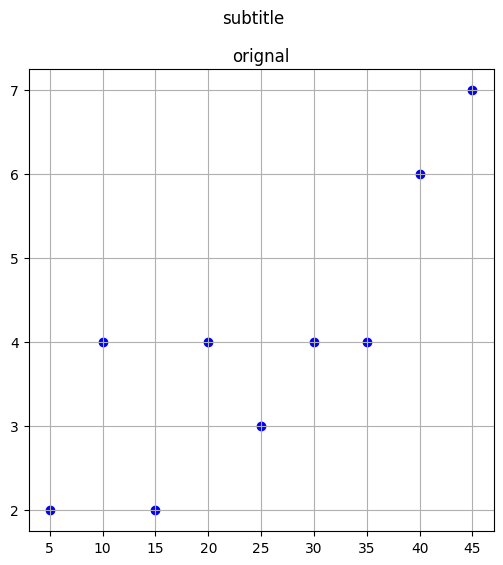

In [188]:
fig, ax = plt.subplots(1,figsize=(6,6))
fig.suptitle("subtitle")
ax1=ax
ax1.grid(True)
ax1.set_title("orignal")
ax1.scatter(x,y,c='blue')

# plot with center as mean

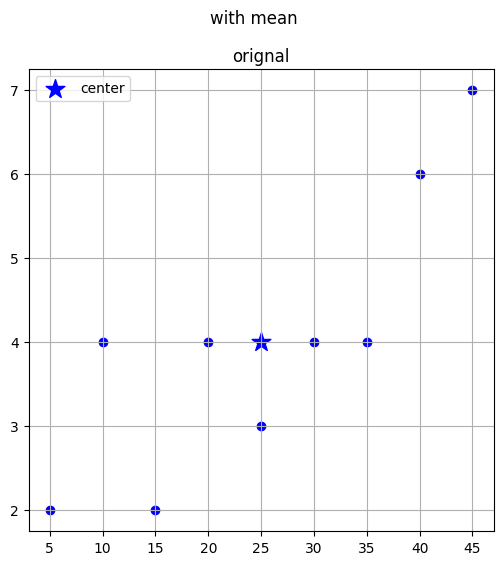

In [189]:
x_mean=df.x.values.mean()
y_mean=df.y.values.mean()
xc=x-x_mean
yc=y-y_mean

df["Xcentered"]=xc
df["Ycentered"]=yc
df
fig.suptitle("with mean")
ax1.scatter(x_mean,y_mean,marker='*',s=200,label='center',c='blue')
fig.set_facecolor('white')
ax1.legend()
fig

### plot of points shifted to origin or mean centered

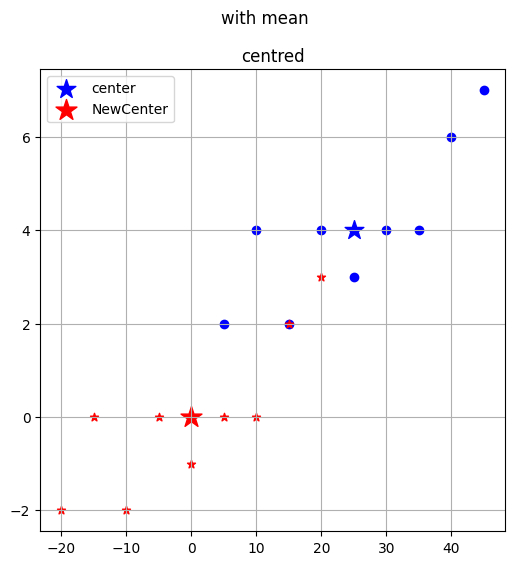

In [190]:
# fig, ax = plt.subplots(1,figsize=(6,6))
ax2=ax1
ax2.grid(True)
ax2.set_title("centred")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.scatter(xc.mean(),yc.mean(),label='NewCenter',marker="*",c='red',s=250)
ax2.legend()
fig

# plot of points centered at origin

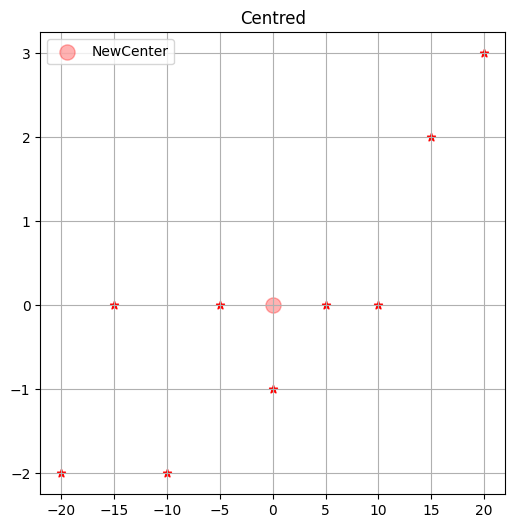

In [191]:
fig2=[]
fig2,ax2=plt.subplots(1,figsize=(6,6))
ax2.grid(True)
ax2.set_title("Centred")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.scatter(xc.mean(),yc.mean(),label='NewCenter',marker="o",c='red',s=120,alpha=.3)
ax2.legend()


## Variance and covariance

$$VAR(X)= \sum \frac{(xi – x)^2}{n}$$ 
or
$$VAR(X,X)= \sum \frac{(xi – x)(xi – x)}{n}$$

$$COV(X, Y) = \sum\frac{(x_i–x)(y_i–y)}{ n}$$


#### in case of small sample data $n$ in often replaced by $n-1$

## function to estimate variance and covariance

In [192]:
def variance(*args):
    a=args[0]
    if len(args)==1:
        b=a
    else:
        b=args[1]
    a=np.array(a)
    b=np.array(b)
    v=np.array([])
    if a.shape!=b.shape:
        print("size error")
        return 0
    # for i in range(0,len(a)):
        
    #     v=np.append(v,a[i]*b[i])
    v=a*b
    var=np.sum(v)/(len(a))
    return var

varX=variance(x)
varY=variance(y)
varXY=variance(x,y)
covXY=varXY

print(f"vaiance of x = {np.round(varX,2)}")
print(f"vaiance of y = {np.round(varY,2)}")
print(f"covaiance of xy = {np.round(covXY,2)}")


vaiance of x = 791.67
vaiance of y = 18.44
covaiance of xy = 116.67


### Standard Deviation


In [193]:

sdX=varX**(1/2)
sdY=varY**(1/2)



### Correlation



$corr(X,Y)=\frac{cov(X,Y)}{\sqrt{var(X)*var(Y)}}$


In [194]:

def correlation(*args):
    if len(args)!=2:
        print('err')
        return
    a=args[0]
    b=args[1]
    varx=variance(a)
    vary=variance(b)
    cov=variance(a,b)
    corr=cov/((varx*vary)**(1/2))
    return corr

corXY=correlation(x,y)
print(f"correlation of xy = {corXY}")


correlation of xy = 0.9654789750359793



### The value of correletion lies in range -1 to 1, however covariance is unbounded

## Covariance Matrix

$$\left[VAR(X)\quad COV(X,Y)\right]$$ 
$$\left[COV(Y,X) \quad VAR(X)\right]$$


here $COV(X,Y)=COV(Y,X)$

# Correlation

$$COR(X,Y)=\frac{COV(X,Y)}{\sqrt{VAR(X)VAR(Y)}}$$

In [195]:
def covMatrix(*args):
    mat=np.array([[0,0],[0,0]])
    a=args[0]
    if len(args)==1:
        b=a
    else:
        b=args[1]


    vara=variance(a)
    varb=variance(b)
    varab=variance(a,b)
    varba=variance(b,a)
    mat[0,0]=vara
    mat[1,1]=varb
    mat[0,1]=varab
    mat[1,0]=varba


    return mat


def corEst(*args):
    mat=[]
    a=args[0]
    if len(args)==1:
        b=a
    else:
        b=args[1]

    vara=variance(a)
    sda=(vara)**(1/2)
    varb=variance(b)
    sdb=(varb)**(1/2)
    varab=variance(a,b)

    mat=varab/(sda*sdb)

    return mat

covMat=covMatrix(x,y)
cor=corEst(x,y)
# print(f"Matrix of xy = \n{np.cov(xc,yc)}")
print(f"Covariance matrix \n{covMat}")
print(f"Correlation (r)= {np.round(cor,2)}")

Covariance matrix 
[[791 116]
 [116  18]]
Correlation (r)= 0.97


# Eigen vector and its value of covariance matrix

In [196]:
E=np.linalg.eig(covMat)
Evec=E[1]
Eval=E[0]
print(f"eigen Vector =\n{Evec}\neig value=\n{Eval}")

eigen Vector =
[[ 0.98939178 -0.14527186]
 [ 0.14527186  0.98939178]]
eig value=
[808.03221681   0.96778319]


# Plot eigen vector direction

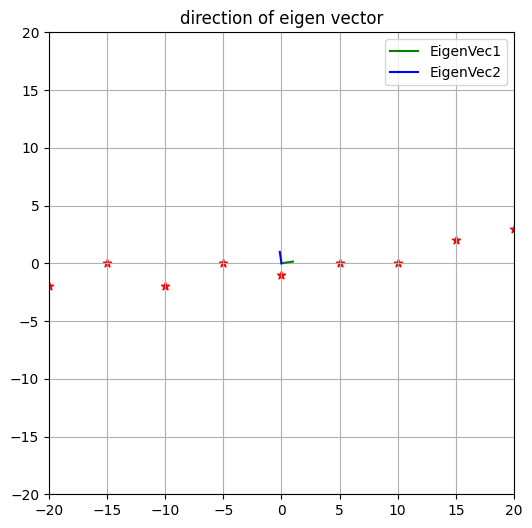

In [197]:
E1=Evec[:,0]
E2=Evec[:,1]

fig2=[]
fig2,ax2=plt.subplots(1,figsize=(6,6))
ax2.grid(True)
ax2.set_title("direction of eigen vector")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVec1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVec2',c='blue')

minrange=min(min(xc),min(yc))
maxrange=max(max(xc),max(yc))
minrange,maxrange
ax2.set(xlim=(minrange,maxrange),ylim=(minrange,maxrange))
ax2.legend()



# plot eigen vector with eigen value

(3,)
eigen vector 1 
[799.46043069 117.38433951]
eigen vector 2
[-0.14059166  0.95751673]


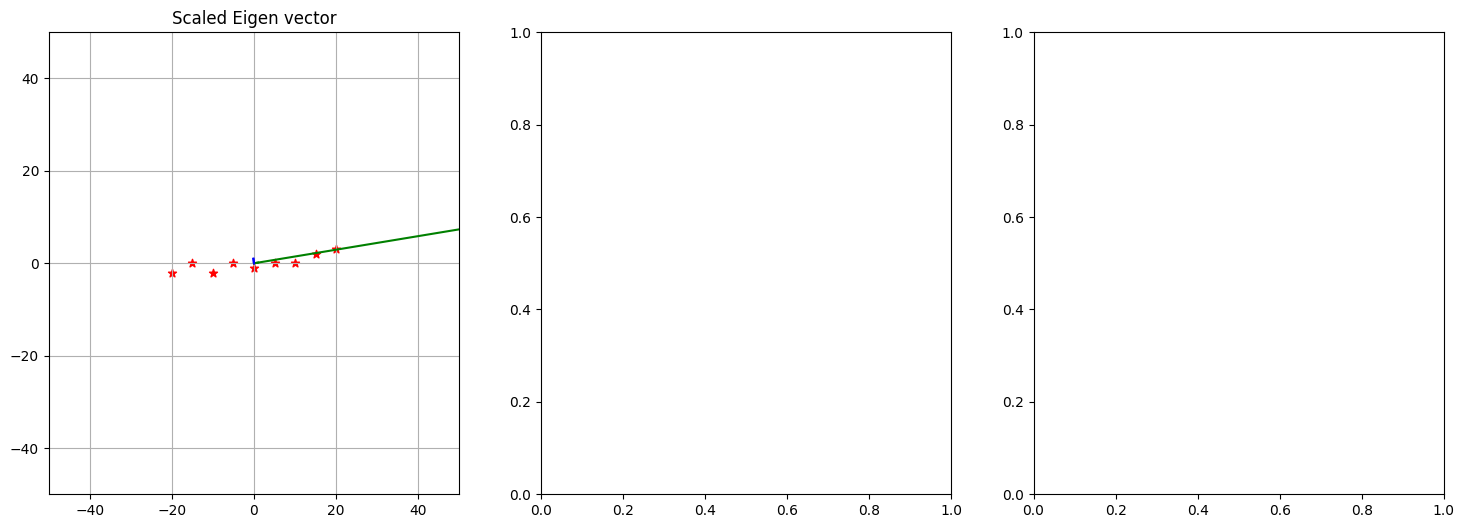

In [198]:
fig2=[]

fig2,ax=plt.subplots(1,3,figsize=(18,6))
fig2.set_facecolor('white')
print(ax.shape)
ax2=ax[0]
ax2.grid(True)
ax2.set_title("Scaled Eigen vector")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVec1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVec2',c='blue')
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVecScale1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVecScale2',c='blue')
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
ax2.set(xlim=(-50,50),ylim=(-50,50))
print(f"eigen vector 1 \n{E1}\neigen vector 2\n{E2}")

eigen vector 1 
[799.46043069 117.38433951]
eigen vector 2
[-0.14059166  0.95751673]


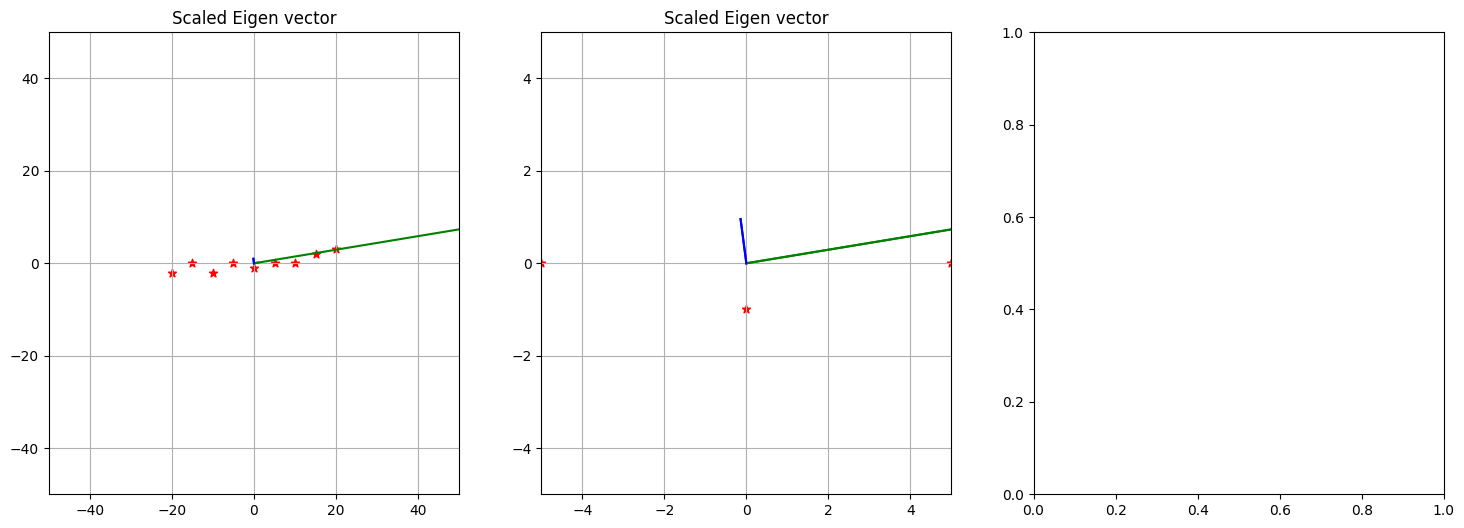

In [199]:

ax2=ax[1]
ax2.grid(True)
ax2.set_title("Scaled Eigen vector")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVec1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVec2',c='blue')
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVecScale1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVecScale2',c='blue')
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
ax2.set(xlim=(-5,5),ylim=(-5,5))
print(f"eigen vector 1 \n{E1}\neigen vector 2\n{E2}")
fig2

eigen vector 1 
[799.46043069 117.38433951]
eigen vector 2
[-0.14059166  0.95751673]


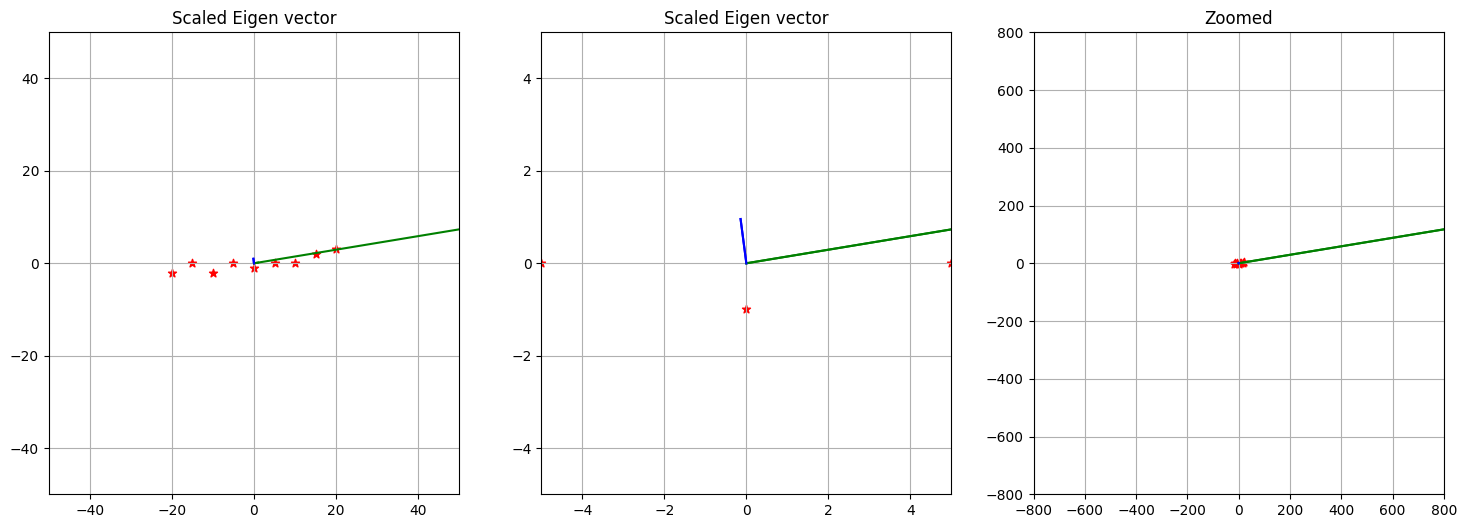

In [200]:
ax2=ax[2]
ax2.grid(True)
ax2.set_title("Zoomed")
ax2.scatter(xc,yc,marker="*",c='red')
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVec1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVec2',c='blue')
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVecScale1',c='green')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVecScale2',c='blue')
ax2.set(xlim=(-800,800),ylim=(-800,800))

# minrange=min(min(xc),min(yc))
# maxrange=max(max(xc),max(yc))
# minrange,maxrange
# ax2.set(xlim=(minrange,maxrange),ylim=(minrange,maxrange))
E1=Evec[:,0]*Eval[0]
E2=Evec[:,1]*Eval[1]
print(f"eigen vector 1 \n{E1}\neigen vector 2\n{E2}")
fig2

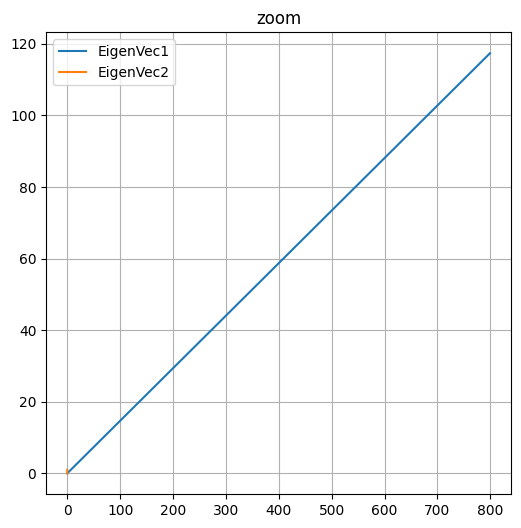

In [201]:
fig2=[]
fig2,ax2=plt.subplots(1,figsize=(6,6))
ax2.grid(True)
ax2.set_title("zoom")
# ax2.scatter(xc,yc,marker="*",c='red')
ax2.plot([0,E1[0]],[0,E1[1]],label='EigenVec1')
ax2.plot([0,E2[0]],[0,E2[1]],label='EigenVec2')
ax2.legend()

## Select Principle component

PC1 is component in the direction of EigenVector1
PC2 is component in the direction of EigenVector2

however if we compare the valued of eiven value

we can see the percentage of variation in eigenvector can be estimated as

$$\frac{EigenValue1}{EigenValue1+EigenValue2}\times 100$$
$$\frac{EigenValue2}{EigenValue1+EigenValue2}\times 100$$

Variation or information in pc1 is 99.88% and  pc2 is 0.12%
[99.88037291  0.11962709]


<BarContainer object of 2 artists>

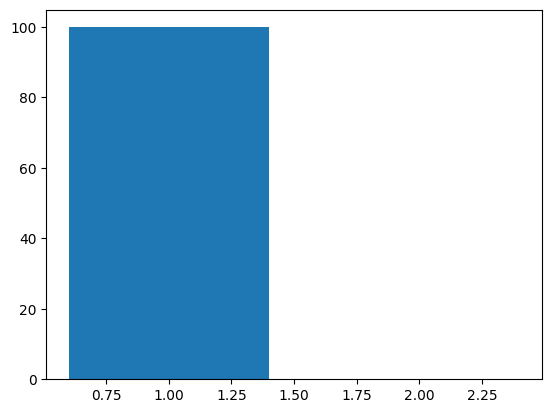

In [202]:

pc=Eval/np.sum(Eval)*100

print(f"Variation or information in pc1 is {np.round(pc[0],2)}% and  pc2 is {np.round(pc[1],2)}%")
print(pc)
plt.bar([1,2],pc)



It means we can drop PC2 without loss of much information or variance in the data

# Now we can transform points with eigen vector

In [203]:
# DIY 

# find transformed points

XY=np.array([x,y]).T
E=Evec[:,0]

# XYTransformed=(XY*E) #np.multiply(E.T,XY)
# XYV=XYTransformed[:,0]+XYTransformed[:,1]
# XY,E,XYTransformed,XYV

# plt.plot(XYV)

XY,E

(array([[ 5.,  2.],
        [10.,  4.],
        [15.,  2.],
        [20.,  4.],
        [25.,  3.],
        [30.,  4.],
        [35.,  4.],
        [40.,  6.],
        [45.,  7.]]),
 array([0.98939178, 0.14527186]))

## Transformed Points

#### Including all PCs

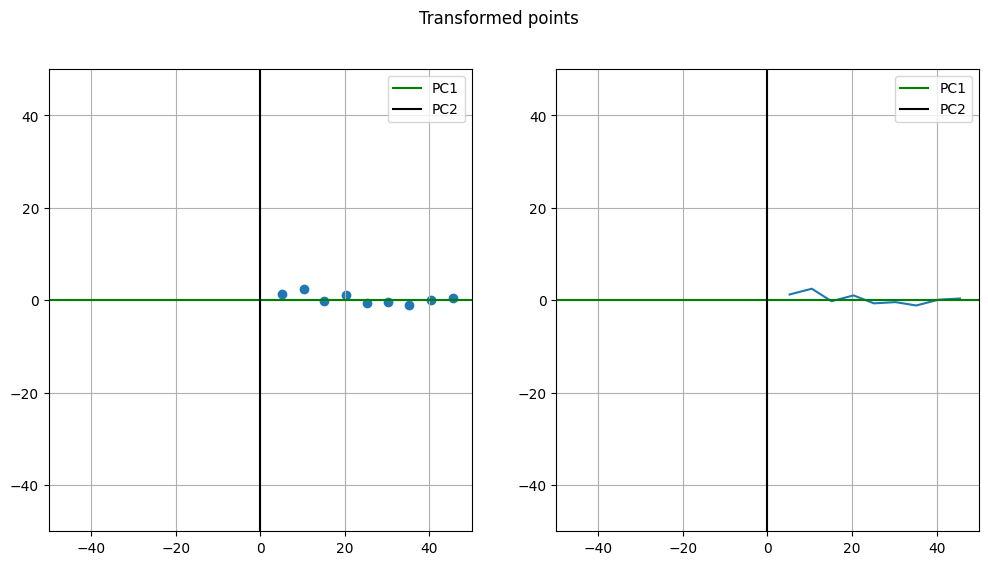

In [204]:
Trans=np.dot(XY,Evec)


fig,axs=plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Transformed points')
ax=axs[0]
ax.scatter(Trans[:,0],Trans[:,1])
ax.grid(True)
ax.set(ylim=(-50,50),xlim=(-50,50))
ax.axhline(y=0, color='g',label="PC1")
ax.axvline(x=0, color='k',label="PC2")
ax.legend()
ax=axs[1]
ax.plot(Trans[:,0],Trans[:,1])
ax.grid(True)
ax.set(ylim=(-50,50),xlim=(-50,50))
ax.axhline(y=0, color='g',label="PC1")
ax.axvline(x=0, color='k',label="PC2")
ax.legend()



#### Including only 1 PC

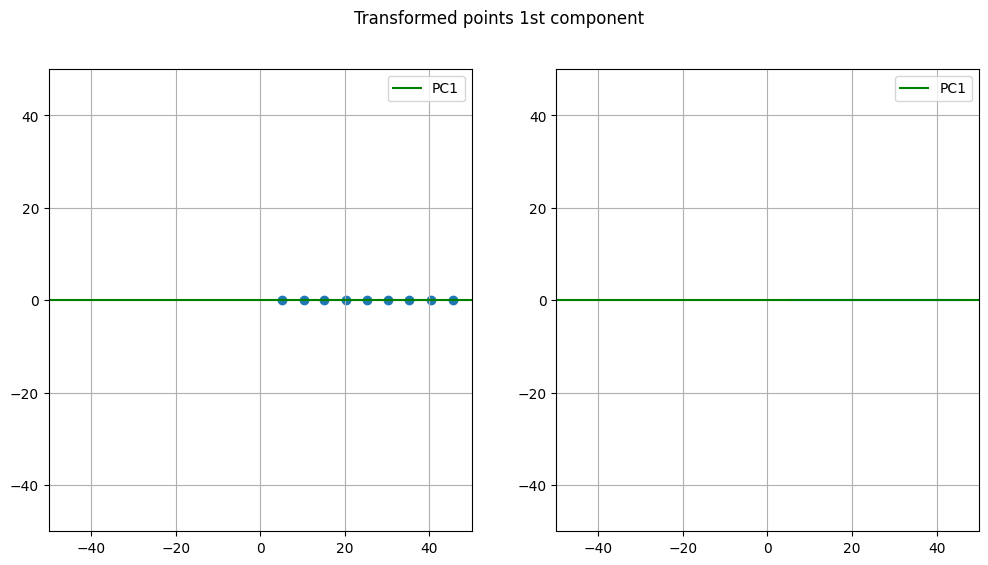

In [205]:
Trans=np.dot(XY,Evec[:,0])


fig,axs=plt.subplots(1,2,figsize=(12,6))
fig.suptitle('Transformed points 1st component')
ax=axs[0]
ax.scatter(Trans,np.arange(0,len(Trans))*0)
ax.grid(True)
ax.set(ylim=(-50,50),xlim=(-50,50))
ax.axhline(y=0, color='g',label="PC1")
# ax.axvline(x=0, color='k',label="PC2")
ax.legend()
ax=axs[1]
ax.plot(Trans,np.arange(0,len(Trans))*0)
ax.grid(True)
ax.set(ylim=(-50,50),xlim=(-50,50))
ax.axhline(y=0, color='g',label="PC1")
# ax.axvline(x=0, color='k',label="PC2")
ax.legend()


In [206]:
np.arange(0,len(Trans))*0

array([0, 0, 0, 0, 0, 0, 0, 0, 0])